In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as np
from openpyxl.workbook import Workbook
import sys
import matplotlib

%matplotlib inline

In [172]:
np.seed(111)
def CrearDataSet(Number=1):
    Output=[]
    for i in range(Number):
        rng=pd.date_range(start='1/1/2010', end='31/12/2021',freq='W-MON')
        
        data=np.randint(low=25,high=100,size=len(rng))
        modelo=['auto-4','camioneta']
        random_modelo=[modelo[np.randint(low=0,high=len(modelo))] for i in range(len(rng))]
        
        marca=['ford','chevrolet','nissan','mercedes','audi','renault']
        random_marca=[marca[np.randint(low=0,high=len(marca))] for i in range(len(rng))]
        Output.extend(zip(random_marca, random_modelo, data, rng))
         
    return Output

In [173]:
dataset=CrearDataSet(4)
df=pd.DataFrame(data=dataset, columns=['marca','modelo','numAutos','fechaIngreso'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2504 entries, 0 to 2503
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   marca         2504 non-null   object        
 1   modelo        2504 non-null   object        
 2   numAutos      2504 non-null   int64         
 3   fechaIngreso  2504 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 78.4+ KB


In [174]:
df.to_csv('siniestros.csv', index=False)

In [184]:
info=pd.read_csv('siniestros.csv')
info.to_csv('siniestros.txt', sep="*")

In [176]:
ruta=r'siniestros.csv'
df=pd.read_csv('siniestros.csv')
df.dtypes

marca           object
modelo          object
numAutos         int64
fechaIngreso    object
dtype: object

In [177]:
tem=df.reset_index().groupby(['fechaIngreso','marca',]).sum()
tem[:20]

index  numAutos
fechaIngreso marca                     
2010-01-04   chevrolet   1878       114
             ford        1878        82
             mercedes       0        44
2010-01-11   audi        1880       169
             nissan         1        66
             renault     1879        48
2010-01-18   audi        1880        28
             chevrolet      2        91
             mercedes    1882       102
2010-01-25   chevrolet   1258        91
             ford         629        70
             mercedes    1881        27
2010-02-01   audi           4        96
             ford         630        26
             nissan      3138       143
2010-02-08   chevrolet   1883        80
             ford        1257        88
             nissan       636       107
2010-02-15   chevrolet    632        49
             ford        1258        34

In [178]:
df['marca'].unique()

array(['mercedes', 'nissan', 'chevrolet', 'audi', 'ford', 'renault'],
      dtype=object)

In [179]:
tem=df.reset_index().groupby(['marca','fechaIngreso']).sum()
tem[:2504]

index  numAutos
marca   fechaIngreso                 
audi    2010-01-11     1880       169
        2010-01-18     1880        28
        2010-02-01        4        96
        2010-03-22     1889        33
        2010-03-29       12        59
...                     ...       ...
renault 2021-11-22      620        30
        2021-11-29     2499        96
        2021-12-06      622        93
        2021-12-13     2501        91
        2021-12-27     1251        87

[1948 rows x 2 columns]

<AxesSubplot:xlabel='fechaIngreso'>

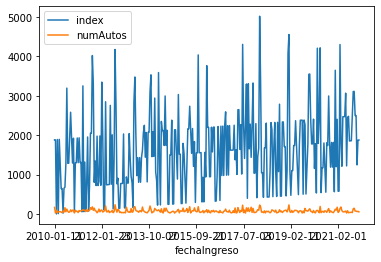

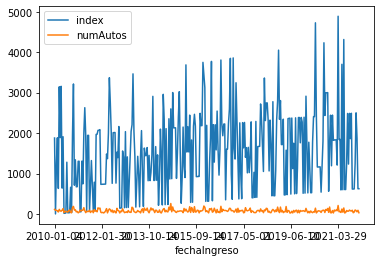

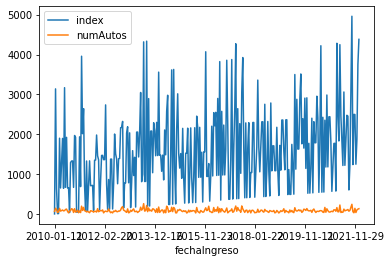

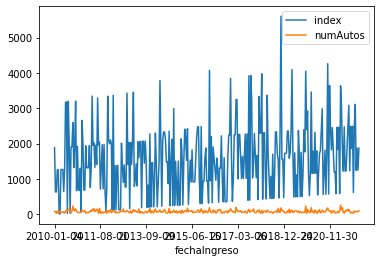

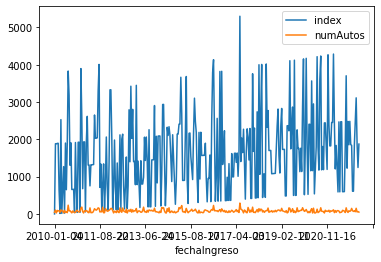

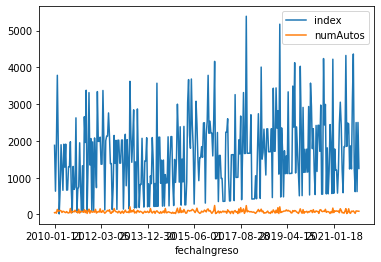

In [180]:
tem.loc['audi'].plot()
tem.loc['chevrolet'].plot()
tem.loc['nissan'].plot()
tem.loc['ford'].plot()
tem.loc['mercedes'].plot()
tem.loc['renault'].plot()

In [181]:
tem=df.reset_index().groupby(['modelo','fechaIngreso']).sum()
tem[:20]

index  numAutos
modelo fechaIngreso                 
auto-4 2010-01-04     1878       158
       2010-01-11     1253        98
       2010-01-18     3134        72
       2010-01-25     2510        97
       2010-02-01        4        96
       2010-02-22     1885        33
       2010-03-01     1894        69
       2010-03-08     1887        27
       2010-03-15      636        83
       2010-03-22     3163       140
       2010-03-29     2528       110
       2010-04-05     2543       107
       2010-04-12     1906       134
       2010-04-19     2549       237
       2010-04-26     1910       132
       2010-05-03     2555       209
       2010-05-10     1270        61
       2010-05-17     1916       107
       2010-05-24     1292       139
       2010-06-07     1944       217

In [182]:
ruta=r'siniestros.csv'
df=pd.read_csv('siniestros.csv')
df2 = df[df['marca'] == 'audi']
df3 = df[df['marca'] == 'chevrolet']
df4 = df[df['marca'] == 'nissan']
df5 = df[df['marca'] == 'ford']
df6 = df[df['marca'] == 'mercedes']
df7 = df[df['marca'] == 'renault']

In [183]:
df2.to_csv('audi.csv', index=False)
df3.to_csv('chevrolet.csv', index=False)
df4.to_csv('nissan.csv', index=False)
df5.to_csv('ford.csv', index=False)
df6.to_csv('mercedes.csv', index=False)
df7.to_csv('renuault.csv', index=False)